<a href="https://colab.research.google.com/github/padath314/nx-guides/blob/main/GraphMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Matching

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

A matching in a graph refers to a set of edges that do not share any common vertices with each other. This means that for any two edges in the matching, they are not connected to the same vertex.

Let us consider a scenario of a summer camp. There is a group of students who are to be made into teams of two. Students who are willing to be teamed up together can only be paired.

Imagine we have the following students:

- Alice
- Bob
- Charlie
- Dave
- Emily
- Freddie
- Grace

Now, let's assume that the students have the following preferences for teaming up:

- Alice is willing to team up with Bob, Dave, and Emily.
- Bob is willing to team up with Alice, Charlie, Grace, and Emily.
- Charlie is willing to team up with Bob, Emily, and Freddie.
- Dave is willing to team up with Alice and Bob.
- Emily is willing to team up with Charlie, Alice, and Dave.
- Freddie is willing to team up with Grace and Charlie.
- Grace is willing to team up with Bob, Freddie, and Alice.

In terms of graph representation, we can visualize the preferences as follows:



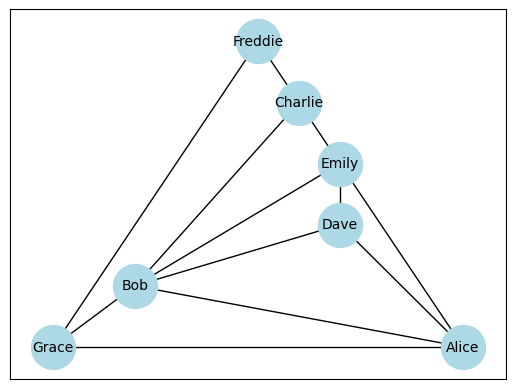

In [ ]:
# Create an empty graph
G = nx.Graph()

preferences = {
    'Alice': ['Bob', 'Dave', 'Emily'],
    'Bob': ['Alice', 'Charlie', 'Grace', 'Emily'],
    'Charlie': ['Bob', 'Emily', 'Freddie'],
    'Dave': ['Alice', 'Bob'],
    'Emily': ['Charlie', 'Alice', 'Dave'],
    'Freddie': ['Grace', 'Charlie'],
    'Grace': ['Bob', 'Freddie', 'Alice']
}

V = set(preferences.keys())
E = set((student, teammate) for student, teammates in preferences.items() for teammate in teammates)

G.add_nodes_from(V)
G.add_edges_from(E)

# Visualize the graph
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
plt.show()

In this scenario, a matching would be the edges that represent the pairings we choose. Since a student cannot be part of more than one team, no vertex will be part of more than one edge in the matching.

Let's try creating a matching and check if it is valid:

Matching: (Alice, Dave), (Emily, Bob), (Grace, Freddie)

To check if this matching is valid, we need to ensure that no student is paired with more than one partner and that all pairs are mutually willing. Let's verify:

- Alice is matched with Dave, which is one of her preferred partners.
- Emily is matched with Bob, which is one of her preferred partners.
- Grace is matched with Freddie, which is one of her preferred partners.

So, this matching is valid since all students are paired with their preferred partners, and no student is paired with more than one partner.

Now, let us confitm this result with the networkx module.

The matching is valid.


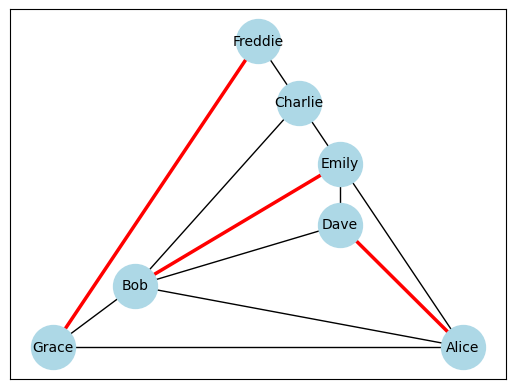

In [ ]:
# Define the matching
matching_1 = [('Alice', 'Dave'), ('Emily', 'Bob'), ('Grace', 'Freddie')]

# Check if the matching is valid
is_valid_matching = nx.is_matching(G, matching_1)

# Print the result
if is_valid_matching:
    print("The matching is valid.")
else:
    print("The matching is not valid.")

matching_graph_1 = G.edge_subgraph(matching_1)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
nx.draw_networkx_edges(matching_graph_1, pos, edge_color='r', width=2.5)

Now, let's try another matching:

Matching: (Alice, Grace), (Freddie, Charlie), (Charlie, Bob), (Bob, Emily), (Emily, Dave)

This matching violates the condition of no student being paired with more than one partner:

- Alice is paired with Grace, but Alice prefers Dave as her partner.
- Freddie is paired with Charlie, but Freddie prefers Grace as his partner.
- Charlie is paired with Bob, but Charlie prefers Emily as his partner.
- Bob is paired with Emily, but Bob prefers Grace as his partner.
- Emily is paired with Dave, but Emily prefers Charlie as her partner.

Therefore, this matching is not valid.

Again, rechecking the result.

The matching is not valid.


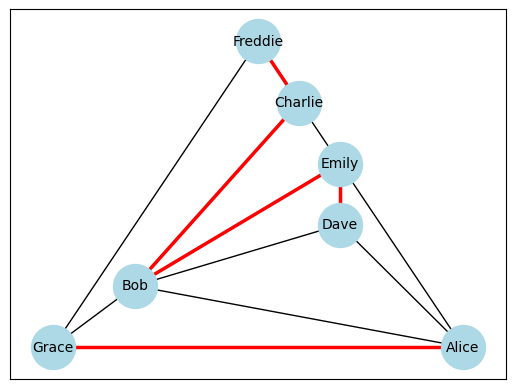

In [ ]:
# Define the second matching
matching_2 = [('Alice', 'Grace'), ('Freddie', 'Charlie'), ('Charlie', 'Bob'), ('Bob', 'Emily'), ('Emily', 'Dave')]

# Check if the matching is valid
is_valid_matching = nx.is_matching(G, matching_2)

# Print the result
if is_valid_matching:
    print("The matching is valid.")
else:
    print("The matching is not valid.")


matching_graph_2 = G.edge_subgraph(matching_2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
nx.draw_networkx_edges(matching_graph_2, pos, edge_color='r', width=2.5)

Use the functions
- is_matching
- is_maximal_matching
- is_perfect_matching
- min_weight_matching
- max_weight_matching

## Augmenting paths

An **alternating path** in a graph G is a path where the edges alternate between being in a set M (matching) and not being in M.

An **augmenting path** P is an alternating path in a graph that starts at one exposed vertex and ends at another distinct exposed vertex. The number of unmatched edges in an augmenting path is one more than the number of matched edges, which means the total number of edges in an augmenting path is odd.

Given G = (V, E) and a matching M of G, a vertex v is **exposed** if no edge of M is incident with v.

To be more specific, an augmenting path starts at a vertex that is not matched (exposed). The path continues by alternately traversing edges that are either in the matching or not in the matching. Finally, the path ends at a different vertex that is also not matched (exposed).









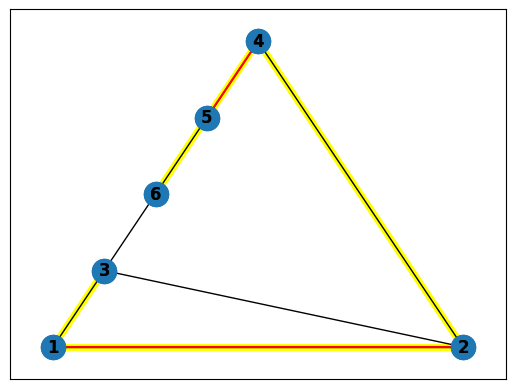

In [ ]:
# code to demonstrate augmenting paths

# Create an empty graph
H = nx.Graph()

# Add nodes to the graph
H.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges to the graph
H.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 6), (4, 5), (5, 6)])

# Visualize the graph
pos = nx.planar_layout(H)

# Find a non-maximal matching
non_maximal_matching = [(1, 2), (4, 5)]
matching_graph = H.edge_subgraph(non_maximal_matching)

# Finding the augmenting path
augmenting_path = [(3, 1), (1, 2), (2, 4), (4, 5), (5, 6)]
aug_path_graph = H.edge_subgraph(augmenting_path)
nx.draw_networkx(aug_path_graph, pos, edge_color='yellow',  width=5 )

nx.draw_networkx(H, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edges(matching_graph, pos,edge_color='r',width=1.5 )

plt.show()


In the above graph, the augmenting path is 3-1-2-4-5-6.

A **matching augmentation** is the process of improving a matching in a graph by finding an augmenting path.

To perform matching augmentation in a graph, follow these steps:

1. Find an augmenting path in the graph.
2. If an augmenting path is found, modify the matching:
   - Add unmatched edges from the augmenting path to the matching,
   - Remove matched edges from the augmenting path
5. Repeat until no more augmenting paths can be found.

By iteratively finding augmenting paths and updating the matching, the process gradually improves the matching, increasing the number of matched vertices and potentially reaching an optimal or near-optimal solution.




In [ ]:
# code that does augmentation in the above graph


### Berge's Lemma
By Berge's lemma, matching M is maximum if and only if there is no M-augmenting path in G. Hence, either a matching is maximum, or it can be augmented. Thus, starting from an initial matching, we can compute a maximum matching by augmenting the current matching with augmenting paths as long as we can find them, and return whenever no augmenting paths are left.

## Blossom Algorithm

Let's see how we can find maximal matchings in a graph using the Blossom algorithm, developed by Jack Edmonds. The importance of this algorithm is that it demonstrated that a solution can be found in polynomial time.

The Blossom algorithm is a graph matching algorithm that can efficiently find a maximal matching in a graph. It works by iteratively finding augmenting paths in the graph and using them to improve the matching. The algorithm is based on the concept of blossoms, which are subgraphs that capture the structure of the graph and help in finding augmenting paths.

The Blossom algorithm has a time complexity of O(V^3), where V is the number of vertices in the graph. This makes it a polynomial-time algorithm, which is significant because it guarantees efficient solutions for graphs of practical size.

## Blossoms and Contractions

### Blossoms

A blossom refers to an odd-length cycle in the graph, denoted by G, which can be contracted to a single vertex. The cycle consists of 2k+1 edges, with exactly k edges belonging to the matching, M. Within the blossom, there exists a special vertex called the base, denoted by v. This base vertex has a stem, which is an alternating path of even length leading from v to an exposed vertex, denoted by w.

Blossoms play a crucial role in matching algorithms by allowing the contraction of odd-length cycles in a graph. These cycles can be treated as a single vertex, enabling the algorithm to continue searching iteratively in the contracted graph. This trickery fools the algorithm into perceiving an even number of nodes, allowing it to apply algorithms like the Hungarian algorithm.

### Finding Blossoms

1. Start from an exposed vertex in the graph.
2. Label the starting vertex as an "outer" vertex (o).
3. Traverse the graph in an alternating fashion, labeling vertices as "inner" (i) and "outer" (o) such that no two adjacent vertices have the same label.
4. If we encounter two adjacent vertices labeled as "outer" (o), then we have found an odd-length cycle, indicating the presence of a blossom.





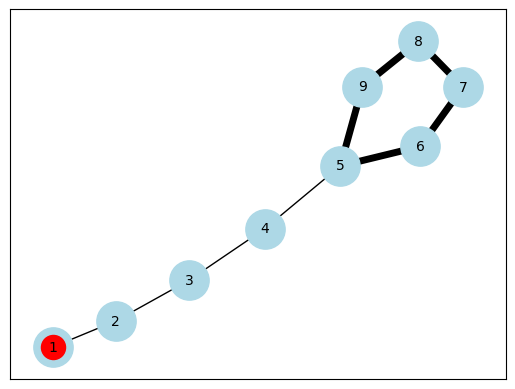

In [ ]:
# Create an empty graph
G1 = nx.Graph()

# Add nodes to the graph
G1.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Add edges to the graph
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 5)])

# Visualize the graph
pos1 = nx.spring_layout(G1)

blossom_edges = [(5, 6), (6, 7), (7, 8), (8, 9), (9, 5)]

nx.draw_networkx(G1, pos1, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_nodes(G1, pos1, nodelist=[1], node_color='red')
nx.draw_networkx_edges(G1, pos1, blossom_edges, width=5)
plt.show()

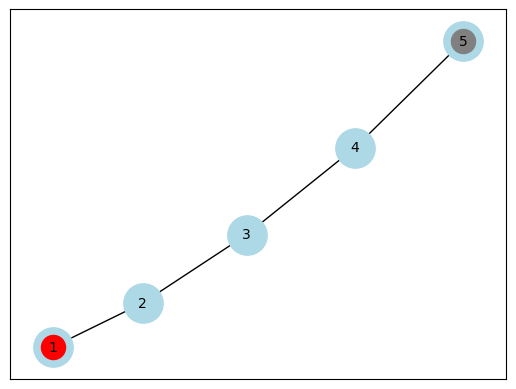

In [ ]:
# Create an empty graph
G2 = nx.Graph()

# Add nodes to the graph
G2.add_nodes_from([1, 2, 3, 4, 5])

# Add edges to the graph
G2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

nx.draw_networkx(G2, pos1, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_nodes(G2, pos1, nodelist=[1], node_color='red')
nx.draw_networkx_nodes(G2, pos1, nodelist=[5], node_color='grey')
plt.show()

##Finding an augmenting path


## References
- https://en.wikipedia.org/wiki/Matching_(graph_theory)

- https://en.wikipedia.org/wiki/Blossom_algorithm

- https://brilliant.org/wiki/blossom-algorithm/